<a href="https://colab.research.google.com/github/Inamulhaq18/Udacity-Bertlsmann-avarato-customer-segmentation/blob/main/Udacity_Arvato_Bertelsmann_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries

In [ ]:
# magic word for producing visualizations in notebook
%matplotlib inline
#importing libraries
%load_ext jupyternotify

#Importing Libraries
import seaborn as sns
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

<IPython.core.display.Javascript object>

## Loading the datasets

In [ ]:
%%notify -m "done"
#loading dataset 
azdias = pd.read_csv('data/azdias.csv', sep=',')
customers = pd.read_csv('data/customers.csv', sep=',')
#loading excel files that explain the attributes
DIAS_attributes=pd.read_excel("data/DIAS_Attributes-Values_2017.xlsx",header=1)
DIAS_info=pd.read_excel("data/DIAS_Information_Levels-Attributes_2017.xlsx",header=1)

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

### Investigate the warnings in column (19,20)

In [ ]:
azdias[azdias.columns[19]].value_counts().index

Index(['8', '9', '6', '4', 8.0, '3', '2', 9.0, '7', 6.0, 4.0, 3.0, 2.0, 7.0,
       '5', 5.0, '1', 1.0, 'X'],
      dtype='object')

In [ ]:
azdias[azdias.columns[20]].value_counts().index

Index(['51', 51.0, '41', '24', 41.0, 24.0, '14', '43', 14.0, '54', 43.0, '25',
       54.0, '22', 25.0, '23', '13', '45', 22.0, '55', '52', 23.0, 13.0, '31',
       45.0, '34', 55.0, '15', 52.0, '44', 31.0, 34.0, '12', 15.0, 44.0, '35',
       '32', '33', 12.0, 32.0, 35.0, 33.0, 'XX'],
      dtype='object')

#### We can see that these two column have 'X', 'XX' (Strings) along with float.
#### Replacing "X" and "XX" with np.nan

In [ ]:
def Replace(df):
    df[df.columns[19]].replace({"XX": np.nan,"X":np.nan}, inplace=True)
    df[df.columns[20]].replace({"XX": np.nan,"X":np.nan}, inplace=True)

def asfloat(df):
    df[df.columns[19]]=df[df.columns[19]].astype(float)
    df[df.columns[20]]=df[df.columns[20]].astype(float)

In [ ]:
Replace(azdias)
Replace(customers)
asfloat(azdias)
asfloat(customers)

In [ ]:
azdias[azdias.columns[19]].value_counts().index

Float64Index([8.0, 9.0, 6.0, 4.0, 3.0, 2.0, 7.0, 5.0, 1.0], dtype='float64')

In [ ]:
azdias[azdias.columns[20]].value_counts().index

Float64Index([51.0, 41.0, 24.0, 14.0, 43.0, 54.0, 25.0, 22.0, 23.0, 13.0, 45.0,
              55.0, 52.0, 31.0, 34.0, 15.0, 44.0, 12.0, 35.0, 32.0, 33.0],
             dtype='float64')

## Exploring Dataset

In [ ]:
azdias.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [ ]:
customers.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [ ]:
A=set(azdias.columns.tolist())
B=set(customers.columns.tolist())
Additionalcolumnsincustomers=B.difference(A)
Additionalcolumnsincustomers

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

In [ ]:
print('Azidias shape: ', azdias.shape)
print('Customers shape: ', customers.shape)
print('DIAS Attributes shape: ', DIAS_attributes.shape)
print('DIAS Info shape: ', DIAS_info.shape)

Azidias shape:  (891221, 367)
Customers shape:  (191652, 370)
DIAS Attributes shape:  (2258, 5)
DIAS Info shape:  (313, 5)


In [ ]:
azdias.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64')

In [ ]:
customers.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64')

In [ ]:
customers.describe()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95825.500000,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,0.000000,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47912.750000,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95825.500000,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143738.250000,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191651.000000,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


#### Exploring the Excel Files to see how we can use them.

In [ ]:
DIAS_info['Information level']=DIAS_info['Information level'].ffill()
DIAS_info['Information level']=DIAS_info['Information level'].bfill()
DIAS_info

,Unnamed: 0,Information level,Attribute,Description,Additional notes
0,NaN,Person,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,NaN,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,NaN,Person,ANREDE_KZ,gender,NaN
3,NaN,Person,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,NaN,Person,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...
...,...,...,...,...,...
308,NaN,Community,ARBEIT,share of unemployed person in the community,NaN
309,NaN,Community,EINWOHNER,inhabitants,NaN
310,NaN,Community,GKZ,standardized community-code,NaN
311,NaN,Community,ORTSGR_KLS9,classified number of inhabitants,NaN


In [ ]:
DIAS_attributes.head(6)


,Unnamed: 0,Attribute,Description,Value,Meaning
0,NaN,AGER_TYP,best-ager typology,-1,unknown
1,NaN,NaN,NaN,0,no classification possible
2,NaN,NaN,NaN,1,passive elderly
3,NaN,NaN,NaN,2,cultural elderly
4,NaN,NaN,NaN,3,experience-driven elderly
5,NaN,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown


In [ ]:
DIAS_attributes['Attribute']=DIAS_attributes['Attribute'].ffill()

In [ ]:
DIAS_attributes.head(15)

,Unnamed: 0,Attribute,Description,Value,Meaning
0,NaN,AGER_TYP,best-ager typology,-1,unknown
1,NaN,AGER_TYP,NaN,0,no classification possible
2,NaN,AGER_TYP,NaN,1,passive elderly
3,NaN,AGER_TYP,NaN,2,cultural elderly
4,NaN,AGER_TYP,NaN,3,experience-driven elderly
5,NaN,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,NaN,ALTERSKATEGORIE_GROB,NaN,1,< 30 years
7,NaN,ALTERSKATEGORIE_GROB,NaN,2,30 - 45 years
8,NaN,ALTERSKATEGORIE_GROB,NaN,3,46 - 60 years
9,NaN,ALTERSKATEGORIE_GROB,NaN,4,> 60 years


##### This table has information on the possible values a column can have, we can use this information to classify outliers
##### From DIAS_attributes.Meaning we can see that we are using multiple notations to note null values, we need to update all the values that mean null to np.nan


#### Investigating Null Values 

In [ ]:
# We need to create a dictionary where key is the column name and value is the value where meaning is "unknown"
unknown_attribute_values = {}
for i, row in DIAS_attributes.iterrows():
    if "unknown" in str(row['Meaning']):
        unknown_attribute_values[row['Attribute']] = [int(num) for num in str(row['Value']).split(', ')]
print(unknown_attribute_values)

{'AGER_TYP': [-1], 'ALTERSKATEGORIE_GROB': [-1, 0], 'ALTER_HH': [0], 'ANREDE_KZ': [-1, 0], 'BALLRAUM': [-1], 'BIP_FLAG': [-1], 'CAMEO_DEUG_2015': [-1], 'CAMEO_DEUINTL_2015': [-1], 'CJT_GESAMTTYP': [0], 'D19_KK_KUNDENTYP': [-1], 'EWDICHTE': [-1], 'FINANZTYP': [-1], 'FINANZ_ANLEGER': [-1], 'FINANZ_HAUSBAUER': [-1], 'FINANZ_MINIMALIST': [-1], 'FINANZ_SPARER': [-1], 'FINANZ_UNAUFFAELLIGER': [-1], 'FINANZ_VORSORGER': [-1], 'GEBAEUDETYP': [-1, 0], 'GEOSCORE_KLS7': [-1, 0], 'HAUSHALTSSTRUKTUR': [-1, 0], 'HEALTH_TYP': [-1], 'HH_EINKOMMEN_SCORE': [-1, 0], 'INNENSTADT': [-1], 'KBA05_ALTER1': [-1, 9], 'KBA05_ALTER2': [-1, 9], 'KBA05_ALTER3': [-1, 9], 'KBA05_ALTER4': [-1, 9], 'KBA05_ANHANG': [-1, 9], 'KBA05_ANTG1': [-1], 'KBA05_ANTG2': [-1], 'KBA05_ANTG3': [-1], 'KBA05_ANTG4': [-1], 'KBA05_AUTOQUOT': [-1, 9], 'KBA05_BAUMAX': [-1, 0], 'KBA05_CCM1': [-1, 9], 'KBA05_CCM2': [-1, 9], 'KBA05_CCM3': [-1, 9], 'KBA05_CCM4': [-1, 9], 'KBA05_DIESEL': [-1, 9], 'KBA05_FRAU': [-1, 9], 'KBA05_GBZ': [-1, 0], 'KBA

In [ ]:
def replacing_unknown_with_nan(df, dictionary):
    for key, value in dictionary.items():
        #print(key, value)
        if key in df.columns:
            for i in range(0, len(value)):
                df.loc[df[key] == value[i], key] = np.nan

In [ ]:
azdias_v1=azdias.copy()
customers_v1=customers.copy()

In [ ]:
%notify -m "Replacing with nan"
replacing_unknown_with_nan(azdias_v1,unknown_attribute_values)
replacing_unknown_with_nan(customers_v1,unknown_attribute_values)

<IPython.core.display.Javascript object>

In [ ]:
print('Pre-filtered Cusmomer df, no of NaN values: ',customers.isna().sum().sum())
print('Post-filtered Cusmomer df, no of actual NaN values: ', customers_v1.isna().sum().sum())

print('Pre-filtered Azdias df, no of NaN values: ', azdias.isna().sum().sum())
print('Post-filtered Azdias df, no of actual NaN values: ', azdias_v1.isna().sum().sum())

Pre-filtered Cusmomer df, no of NaN values:  13864774
Post-filtered Cusmomer df, no of actual NaN values:  14488721
Pre-filtered Azdias df, no of NaN values:  33493669
Post-filtered Azdias df, no of actual NaN values:  37088263


### Managing Outliers 

In [ ]:
def get_unique_values(df):
    '''This function accept a dataframe for which it will 
    calculate the range of its actual values.
    Args:
    df: demographics dataframe
    returns: dictionary with unique ranges for every column
    in the given dataframe.
    '''
    dict_unique_values = {}
    for col in df.columns:
        if col != "LNR":
            dict_unique_values[col] = df[col].unique()
    return dict_unique_values

In [ ]:
print(get_unique_values(azdias_v1))

{'Unnamed: 0': array([     0,      1,      2, ..., 891218, 891219, 891220], dtype=int64), 'AGER_TYP': array([nan,  2.,  3.,  0.,  1.]), 'AKT_DAT_KL': array([nan,  9.,  1.,  5.,  8.,  7.,  6.,  4.,  3.,  2.]), 'ALTER_HH': array([nan, 17., 13., 20., 10., 14., 16., 21., 11., 19., 15.,  9., 18.,
        8.,  7., 12.,  4.,  3.,  6.,  5.,  2.,  1.]), 'ALTER_KIND1': array([nan, 17., 10., 18., 13., 16., 11.,  6.,  8.,  9., 15., 14.,  7.,
       12.,  4.,  3.,  5.,  2.]), 'ALTER_KIND2': array([nan, 13.,  8., 12., 10.,  7., 16., 15., 14., 17.,  5.,  9., 18.,
       11.,  6.,  4.,  3.,  2.]), 'ALTER_KIND3': array([nan, 10., 18., 17., 16.,  8., 15.,  9., 12., 13., 14., 11.,  7.,
        5.,  6.,  4.]), 'ALTER_KIND4': array([nan, 10.,  9., 16., 14., 13., 11., 18., 17., 15.,  8., 12.,  7.]), 'ALTERSKATEGORIE_FEIN': array([nan, 21., 17., 13., 14., 10., 16., 20., 11., 19., 15., 18.,  9.,
       22., 12.,  0.,  8.,  7., 23.,  4., 24.,  6.,  3.,  2.,  5., 25.,
        1.]), 'ANZ_HAUSHALTE_AKTIV': array(

In [ ]:
def get_attributes_range():
    '''This function gathers the information on the
    proper ranges for every column of the dataset.
    Args:
    none
    returns: dictionary with unique ranges for every column
    of the dataset.
    '''
    dict_of_attr = {}
    for i, row in DIAS_attributes.iterrows():
        #print(row['Attribute'])
        if row['Attribute'] in dict_of_attr:
            dict_of_attr[row['Attribute']].append(row['Value'])
        else:
            dict_of_attr[row['Attribute']] = [row['Value']]
    #print(dict_of_attr)
    return dict_of_attr

In [ ]:
attributes_proper_range = get_attributes_range()
print(attributes_proper_range)

{'AGER_TYP': [-1, 0, 1, 2, 3], 'ALTERSKATEGORIE_GROB': ['-1, 0', 1, 2, 3, 4, 9], 'ALTER_HH': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'ANREDE_KZ': ['-1, 0', 1, 2], 'ANZ_HAUSHALTE_AKTIV': ['…'], 'ANZ_HH_TITEL': ['…'], 'ANZ_PERSONEN': ['…'], 'ANZ_TITEL': ['…'], 'BALLRAUM': [-1, 1, 2, 3, 4, 5, 6, 7], 'BIP_FLAG': [-1, 0, 1], 'CAMEO_DEUG_2015': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'CAMEO_DEU_2015': ['1A', '1B', '1C', '1D', '1E', '2A', '2B', '2C', '2D', '3A', '3B', '3C', '3D', '4A', '4B', '4C', '4D', '4E', '5A', '5B', '5C', '5D', '5E', '5F', '6A', '6B', '6C', '6D', '6E', '6F', '7A', '7B', '7C', '7D', '7E', '8A', '8B', '8C', '8D', '9A', '9B', '9C', '9D', '9E'], 'CAMEO_DEUINTL_2015': [-1, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 31, 32, 33, 34, 35, 41, 42, 43, 44, 45, 51, 52, 53, 54, 55], 'CJT_GESAMTTYP': [0, 1, 2, 3, 4, 5, 6], 'D19_BANKEN_ANZ_12': [0, 1, 2, 3, 4, 5, 6], 'D19_BANKEN_ANZ_24': [0, 1, 2, 3, 4, 5, 6], 'D19_BANKEN_DATUM': [1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
### Analysizing the difference
def get_difference(actual_entries_dictionary):
    '''This function accepts the dictionary with actual 
    data ranges of the dataframe and compares them with the ones
    that are correct gathers. Function returns the outliers 
    for each column is such exist. 
    Args: 
    actual_entries_dictionary: dictionary with actual entries 
    returns: dictionary with outliers for each column.
    '''
    dict_of_outliers = {}
    for key, value in actual_entries_dictionary.items():
        if key in attributes_proper_range:
            dict_of_outliers[key] = [item for item in value if item not in attributes_proper_range[key]]
    return dict_of_outliers

def get_validation(df):
    '''This function print the outliers to the console. 
    Args: 
    df: demographic dataframe
    returns: none
    key'''
    outliers={}
    validation_dict = get_difference(get_unique_values(df))
    for key, value in validation_dict.items():
        if len(value) > 1 or (len(value) == 1 and "nan" not in str(value[0])):
            #print(key,(value))
            outliers[key]=[value]
    return(outliers)

In [ ]:
outliers=get_validation(azdias_v1)
outliers.keys()

dict_keys(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL', 'CAMEO_DEU_2015', 'GEBURTSJAHR', 'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR'])

In [ ]:
def remove_outliers(df, sub_df):
    lower = sub_df.quantile(0.25)
    upper = sub_df.quantile(0.75)
    IQR = upper - lower
    df = df[~((sub_df < (lower - 1.5 * IQR)) | (sub_df > (upper + 1.5 * IQR))).any(axis=1)]
    return(df)

In [ ]:
remove_outliers(azdias_v1, azdias_v1[['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL', 'KBA13_ANZAHL_PKW']])
remove_outliers(customers_v1, azdias_v1[['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL', 'KBA13_ANZAHL_PKW']])

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,9626,2.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,...,2.0,6.0,9.0,7.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,1.0,4.0
1,1,9628,NaN,9.0,11.0,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,9.0,NaN,3.0,FOOD,SINGLE_BUYER,0,1.0,4.0
2,2,143872,NaN,1.0,6.0,NaN,NaN,NaN,NaN,0.0,...,11.0,6.0,9.0,2.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,2.0,4.0
3,3,143873,1.0,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,2.0,NaN,9.0,7.0,1.0,COSMETIC,MULTI_BUYER,0,1.0,4.0
5,5,143888,1.0,1.0,11.0,NaN,NaN,NaN,NaN,10.0,...,1.0,6.0,9.0,1.0,2.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191645,191645,154554,2.0,1.0,21.0,NaN,NaN,NaN,NaN,13.0,...,3.0,2.0,9.0,4.0,6.0,COSMETIC_AND_FOOD,MULTI_BUYER,1,1.0,4.0
191646,191646,154559,3.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,1.0,6.0,9.0,4.0,3.0,FOOD,SINGLE_BUYER,0,2.0,2.0
191649,191649,148813,2.0,1.0,15.0,NaN,NaN,NaN,NaN,10.0,...,5.0,3.0,9.0,3.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,1.0,4.0
191650,191650,148852,3.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,1.0,4.0,9.0,2.0,3.0,FOOD,SINGLE_BUYER,0,2.0,3.0


In [ ]:
additional_missing_values = {'KBA05_MODTEMP': [6.0], 'LP_FAMILIE_FEIN': [0.0], 'LP_FAMILIE_GROB': [0.0],
                            'LP_LEBENSPHASE_FEIN': [0.0], 'LP_LEBENSPHASE_GROB': [0.0], 'ORTSGR_KLS9': [0.0], 'GEBURTSJAHR': [0]}
replacing_unknown_with_nan(customers_v1, additional_missing_values)
replacing_unknown_with_nan(azdias_v1, additional_missing_values)

### Managing Missing Values 

In [ ]:
def missing_values(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
    return(missing_value_df)

In [ ]:
def deleting_missing_columns(df, percent, delete):
    missing_value_above_percent=missing_values(df)
    missing_value_above_percent=missing_value_above_percent[missing_value_above_percent["percent_missing"]>percent].reset_index()
    del missing_value_above_percent['index']
    missing_value_above_percent_column=list(missing_value_above_percent['column_name'])
    if delete==1:
        df.drop(missing_value_above_percent_column, axis=1, inplace=True)
    else:
        return(missing_value_above_percent)

In [ ]:
deleting_missing_columns(azdias_v1,50,0)

,column_name,percent_missing
0,ALTER_KIND4,99.864792
1,TITEL_KZ,99.757636
2,ALTER_KIND3,99.307691
3,ALTER_KIND2,96.690047
4,ALTER_KIND1,90.904837
5,AGER_TYP,76.019640
6,EXTSEL992,73.399639
7,KK_KUNDENTYP,65.596749
8,KBA05_BAUMAX,53.468668


In [ ]:
deleting_missing_columns(customers_v1,50,0)

,column_name,percent_missing
0,ALTER_KIND4,99.876860
1,ALTER_KIND3,99.334732
2,TITEL_KZ,98.793647
3,ALTER_KIND2,97.338927
4,ALTER_KIND1,93.860748
5,KK_KUNDENTYP,58.406382
6,KBA05_BAUMAX,57.153069


#### Let's delete the columns that have more than 50% of missing values

In [ ]:
deleting_missing_columns(azdias_v1,50,1)
deleting_missing_columns(customers_v1,50,1)

#### Exploring missing values row wise

In [ ]:
azdias_rows_empty=azdias_v1.isnull().sum(axis=1).tolist()
customers_rows_empty=customers_v1.isnull().sum(axis=1).tolist()

In [ ]:
azdias_rows_empty

[250,
 10,
 0,
 8,
 0,
 0,
 3,
 0,
 9,
 0,
 0,
 255,
 64,
 66,
 255,
 123,
 6,
 255,
 15,
 12,
 129,
 12,
 12,
 125,
 255,
 6,
 195,
 1,
 9,
 2,
 232,
 3,
 0,
 0,
 4,
 250,
 12,
 0,
 12,
 6,
 16,
 0,
 2,
 0,
 0,
 0,
 237,
 0,
 255,
 12,
 10,
 0,
 57,
 250,
 255,
 12,
 2,
 1,
 0,
 3,
 5,
 250,
 250,
 0,
 15,
 12,
 0,
 0,
 0,
 255,
 7,
 12,
 72,
 182,
 1,
 255,
 250,
 1,
 3,
 0,
 11,
 252,
 0,
 250,
 0,
 2,
 0,
 0,
 65,
 4,
 232,
 0,
 3,
 1,
 15,
 12,
 16,
 255,
 0,
 255,
 1,
 0,
 4,
 255,
 0,
 0,
 250,
 0,
 255,
 250,
 0,
 12,
 255,
 0,
 6,
 0,
 1,
 1,
 9,
 0,
 3,
 0,
 0,
 2,
 1,
 1,
 0,
 9,
 0,
 12,
 3,
 0,
 0,
 255,
 3,
 0,
 13,
 255,
 216,
 12,
 1,
 18,
 190,
 195,
 255,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 250,
 255,
 12,
 20,
 66,
 200,
 9,
 0,
 2,
 15,
 255,
 3,
 222,
 12,
 0,
 255,
 0,
 0,
 0,
 1,
 203,
 12,
 255,
 189,
 12,
 194,
 250,
 1,
 0,
 2,
 12,
 21,
 12,
 7,
 9,
 1,
 0,
 1,
 20,
 1,
 10,
 1,
 12,
 3,
 64,
 0,
 231,
 0,
 0,
 20,
 9,
 0,
 250,
 0,
 0,
 4,
 255,
 255,
 0,
 0,
 

In [ ]:
azdias_rows_emptydf=pd.DataFrame(azdias_rows_empty)
azdias_rows_emptydf["Empty percentage"]=azdias_rows_emptydf[0]*(100/367)
index_to_remove_azdias=((azdias_rows_emptydf[azdias_rows_emptydf["Empty percentage"]>30]).index).tolist()

In [ ]:
azdias_rows_emptydf

,0,Empty percentage
0,250,68.119891
1,10,2.724796
2,0,0.000000
3,8,2.179837
4,0,0.000000
...,...,...
891216,6,1.634877
891217,4,1.089918
891218,6,1.634877
891219,1,0.272480


In [ ]:
customers_rows_emptydf=pd.DataFrame(customers_rows_empty)
customers_rows_emptydf["Empty percentage"]=customers_rows_emptydf[0]*(100/367)
index_to_remove_customer=((customers_rows_emptydf[customers_rows_emptydf["Empty percentage"]>30]).index).tolist()

In [ ]:
azdias_v2=azdias_v1.drop(index_to_remove_azdias)

In [ ]:
customers_v2=customers_v1.drop(index_to_remove_customer)

### Filling Missing Values

In [ ]:
def fillnamean(df):
    for column in df:
     if df[column].dtype=="float64"or"int64" and df[column].dtype!="O":
        #print(column)
        df[column].fillna(int(df[column].mean()), inplace=True)
        
def fillnaobject (df):
    for column in df:
     if df[column].dtype=="O":
        #print(column)
        df[column]=df[column].ffill()
        df[column]=df[column].bfill()


In [ ]:
fillnamean(azdias_v2)
fillnaobject(azdias_v2)
fillnamean(customers_v2)
fillnaobject(customers_v2)

In [ ]:
customers_missing=customers_v2.isnull().sum().to_frame("missing")
customers_missing[customers_missing["missing"]>0]

,missing


In [ ]:
azdias_v2=azdias_v2.drop(['Unnamed: 0'],axis=1)
customers_v2=customers_v2.drop(['Unnamed: 0'],axis=1)

In [ ]:
deleting_missing_columns(azdias_v2,0,0)

,column_name,percent_missing


In [ ]:
deleting_missing_columns(customers_v2,0,0)

,column_name,percent_missing


In [ ]:
azdias_v2.shape

(785420, 357)

In [ ]:
customers_v2.shape

(140371, 362)

### Database Distribution

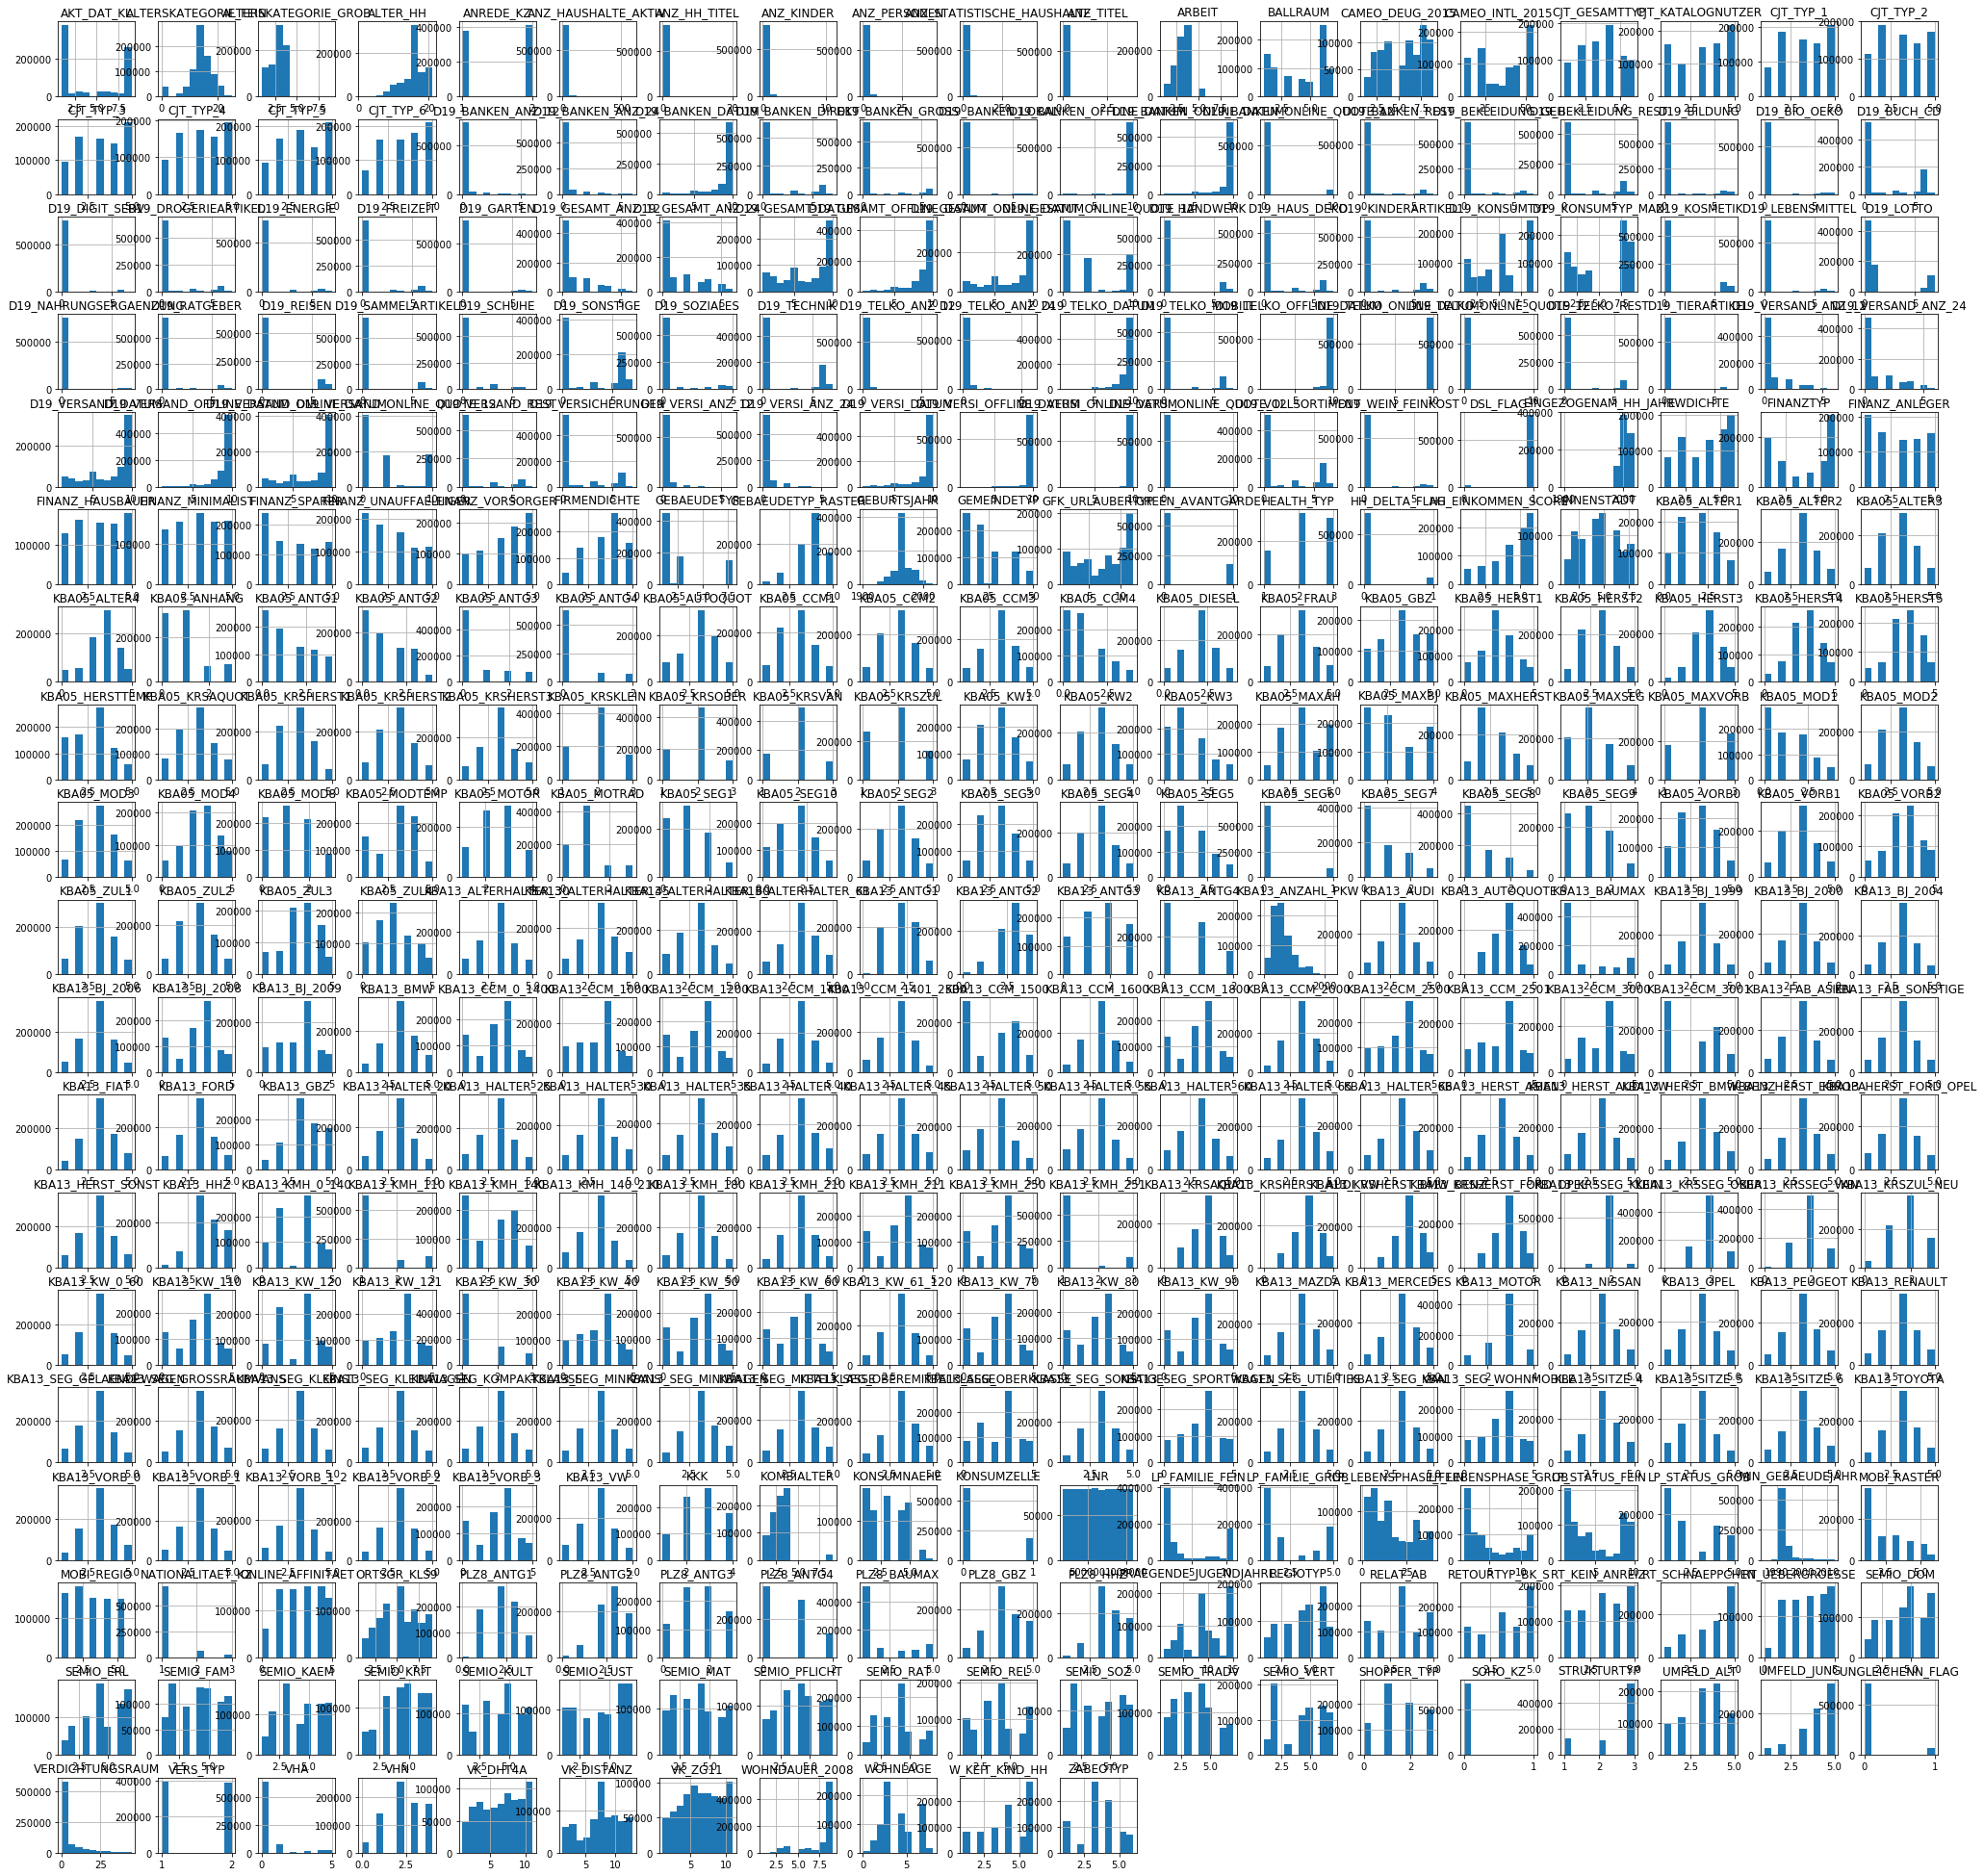

In [ ]:
azdias_v2.hist(figsize = (35,35))
plt.show()

In [ ]:
def perform_log_transform(df):
    df_log = pd.DataFrame()
    for col in df.columns:
        if df[col].dtype=="float64"or df[col].dtype=="int64":
            df_log[col]=(df[col]+1).transform(np.log)
    return df_log

In [ ]:
azdias_log = perform_log_transform(azdias_v2)
customers_log = perform_log_transform(customers_v2)

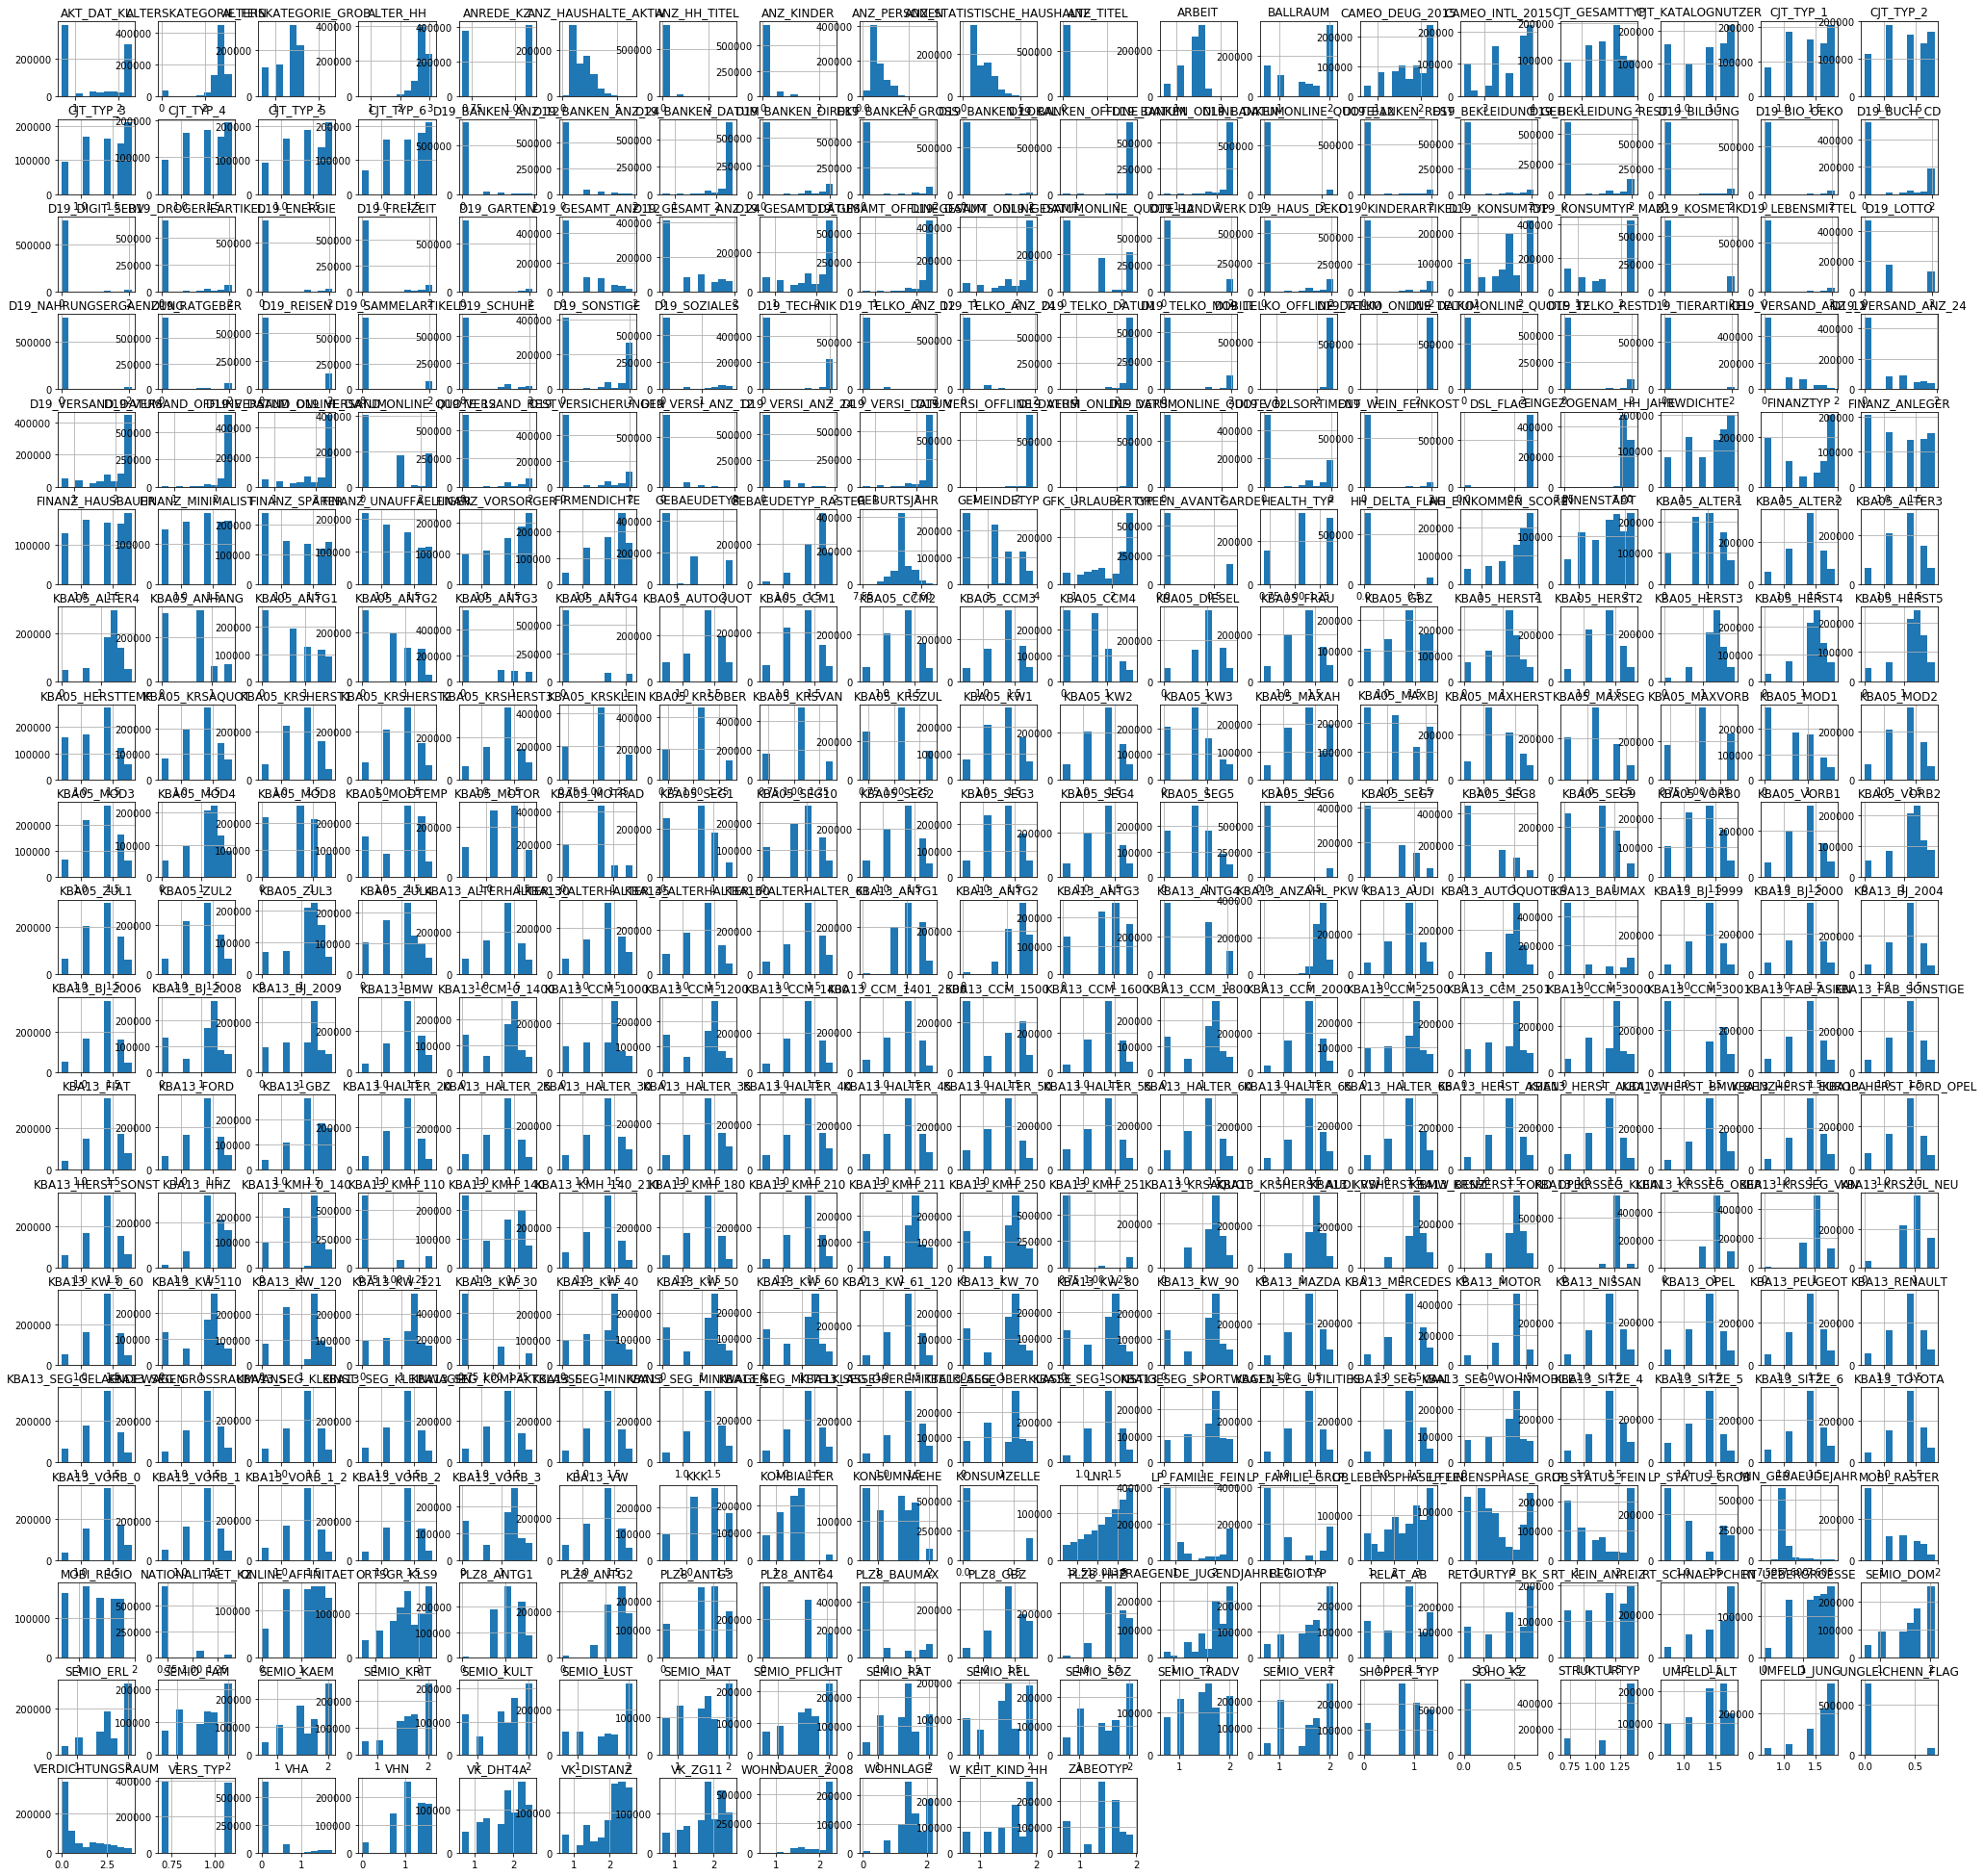

In [ ]:
azdias_log.hist(figsize = (35,35))
plt.show()

### Applying Feature Scaling 

In [ ]:
def feature_scaling(df):
    scaled = MinMaxScaler().fit_transform(df)
    return pd.DataFrame(scaled, columns = df.columns)

In [ ]:
azdias_v3 = feature_scaling(azdias_log)
customers_v3 = feature_scaling(customers_log)

### Saving the preprocessed data

In [ ]:
azdias_v3.to_csv('data/azdias_v3.0')

In [ ]:
customers_v3.to_csv('data/customers_v3.0')

In [ ]:
DIAS_info.to_csv('data/DIAS_info')

### Applying Dimensionality Reduction using PCA

In [ ]:
def sklearn_pca(data, n_components=None):
    '''This function builds the scikit-learn PCA model. 
    Args: 
    data: demographic dataframe
    n_components: number of components
    returns: 
    pca: pca model
    data_transformed: transformed data
    '''
    pca = PCA(n_components)
    data_transformed = pca.fit_transform(data)
    return pca, data_transformed

In [ ]:
def plot_variance_sklearn(pca):
    '''This function plots the graph of the explained variance ratio. 
    Args: 
    pca: pca model
    returns: none
    '''
    exp_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(exp_variance)
    plt.xlabel('No of Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance Ratio')
    plt.grid(b=True)
    plot = plt.show()

In [ ]:
azdias_pca_model, pca_transformed = sklearn_pca(azdias_v3)

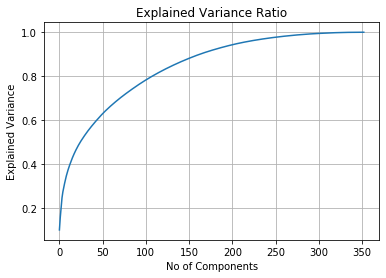

In [ ]:
plot_variance_sklearn(azdias_pca_model)

#### From the graph we can conclude that 150 components explain ~90% of the variance 

In [ ]:
%%notify -m "done"
azdias_pca_model, azdias_pca_transformed = sklearn_pca(azdias_v3, 150)
customers_pca_model, customers_pca_transformed = sklearn_pca(customers_v3, 150)

<IPython.core.display.Javascript object>

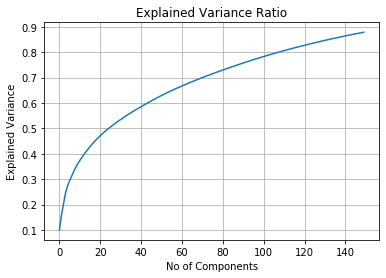

In [ ]:
plot_variance_sklearn(azdias_pca_model)

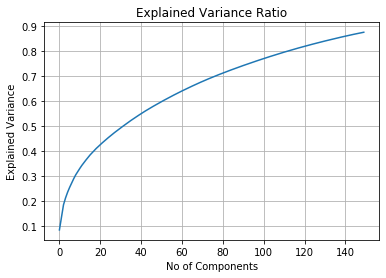

In [ ]:
plot_variance_sklearn(customers_pca_model)

### PCA Conclusion 

Moving ahead we will be reducing the dimensions to 150, dimensions as they collectively contribute 95+ percent of information.

In [ ]:
print("Before : ",azdias_v3.shape)
print("After : ",azdias_pca_transformed.shape)

Before :  (785420, 353)
After :  (785420, 150)


## Customer Segmentation (using K-Means)

In [ ]:
def plot_elbow_curve(data):
    '''This function performes 13 KMeans model for each
    k in range from 2 to 15, in order to find the most suitable K-value
    and plots the graph for the elbow method. 
    Args: 
    data: demographic dataframe
    returns: none
    '''
    points = np.array([])
    K = range(2,15)
    for k in K:
        
        t = time.time()
        
        kmeans = KMeans(k)
        km = kmeans.fit(data)
        points = np.append(points, np.abs(km.score(data)))
        print("Done in {:.2f} sec.".format(time.time()-t))
        
    plt.plot(K, points, 'bx-')
    plt.xlabel('no of K')
    plt.ylabel('avg distance to centroid')
    plt.title('Elbow Graph')
    plt.show()

Done in 14.83 sec.
Done in 22.68 sec.
Done in 29.53 sec.
Done in 47.48 sec.
Done in 60.61 sec.
Done in 76.39 sec.
Done in 98.36 sec.
Done in 108.72 sec.
Done in 131.03 sec.
Done in 118.30 sec.
Done in 155.23 sec.
Done in 139.31 sec.
Done in 178.58 sec.


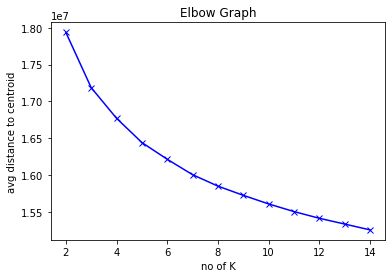

In [ ]:
plot_elbow_curve(azdias_pca_transformed)

### From the graph we can see that 7 clusters is an optimal amount of clusters to use for the dataset

### Initiating Kmeans

In [ ]:
kmeans = KMeans(7)

In [ ]:
kmeans.fit(azdias_pca_transformed)

KMeans(n_clusters=7)

In [ ]:
azdias_clusters = kmeans.predict(azdias_pca_transformed)

In [ ]:
customers_clusters=kmeans.predict(customers_pca_transformed)

In [ ]:
azdias_clusters

array([1, 3, 6, ..., 3, 1, 6])

In [ ]:
customers_clusters

array([5, 2, 6, ..., 6, 3, 5])

In [ ]:
km_azdias = pd.Series(azdias_clusters, name='Azdias')
km_customers = pd.Series(customers_clusters, name='Customers')

In [ ]:
clusters_df = pd.concat([km_azdias.value_counts().sort_index(), km_customers.value_counts().sort_index()], axis=1)

In [ ]:
clusters_df = clusters_df.assign(perc_of_Azdias=lambda x: round((x.Azdias * 100 / clusters_df.Azdias.sum()),2))
clusters_df = clusters_df.assign(perc_of_Customers=lambda x: round((x.Customers * 100 / clusters_df.Customers.sum()),2))

In [ ]:
clusters_df

,Azdias,Customers,perc_of_Azdias,perc_of_Customers
0,73615,14367,9.37,10.24
1,116016,21127,14.77,15.05
2,137027,22174,17.45,15.80
3,133503,18800,17.00,13.39
4,88488,18173,11.27,12.95
5,118732,21401,15.12,15.25
6,118039,24329,15.03,17.33


In [ ]:
clusters_df['difference']=clusters_df['perc_of_Customers']-clusters_df['perc_of_Azdias']

In [ ]:
clusters_df

,Azdias,Customers,perc_of_Azdias,perc_of_Customers,difference
0,73615,14367,9.37,10.24,0.87
1,116016,21127,14.77,15.05,0.28
2,137027,22174,17.45,15.80,-1.65
3,133503,18800,17.00,13.39,-3.61
4,88488,18173,11.27,12.95,1.68
5,118732,21401,15.12,15.25,0.13
6,118039,24329,15.03,17.33,2.30


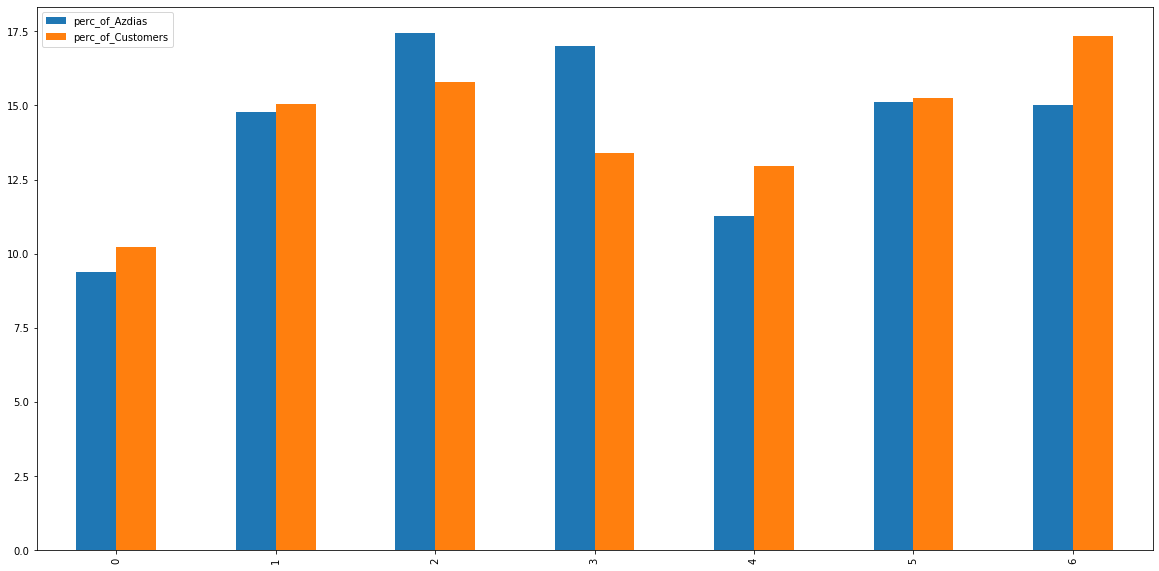

In [ ]:
clusters_df[['perc_of_Azdias','perc_of_Customers']].plot(kind='bar',figsize=(20,10))

### Clustering Analysis

In [ ]:
def combine_info(df, pca, kmeans, cluster):
    '''This function reverses the output of the KMeans and PCA, so that
    it possible to understand values from which columns describe clusters. 
    Args: 
    data: demographic dataframe
    pca: pca model
    kmeans: kmeans model
    cluster: number of the cluster (index)
    returns: none
    '''
    clusters_dict = dict(zip(df.columns, pca.inverse_transform(kmeans.cluster_centers_[cluster])))
    cluster_df = pd.DataFrame.from_dict(clusters_dict, orient='index', columns=['Values']).sort_values(by='Values')
    cluster_df['Description'] = np.nan
    cluster_df['Information level'] = np.nan
    for index, row in DIAS_info.iterrows():
        index_val = row['Attribute']
        cluster_df.loc[cluster_df.index == index_val, "Description"] = row['Description']
        cluster_df.loc[cluster_df.index == index_val, "Information level"] = row['Information level']

    #cluster_df = pd.concat((cluster_df[:10], cluster_df[-10:]), axis=0)
    print(cluster_df[-20:])
    cluster_df[-20:].plot(kind='barh')
    return((cluster_df.sort_values('Values',ascending=False)).head(10))

## Cluster 0
The percentage of customers in this clusters is more than percentage of general population, which mean this cluster is a good representation of perspective customers.

                              Values  \
D19_GESAMT_ONLINE_QUOTE_12  0.863962   
KBA13_ANTG2                 0.868198   
D19_VERSI_DATUM             0.875192   
PLZ8_ANTG2                  0.880153   
D19_BANKEN_ONLINE_DATUM     0.892242   
ORTSGR_KLS9                 0.892800   
EXTSEL992                   0.894953   
ONLINE_AFFINITAET           0.897524   
LNR                         0.912753   
D19_TELKO_DATUM             0.912831   
FINANZ_VORSORGER            0.917689   
D19_TELKO_OFFLINE_DATUM     0.963258   
D19_BANKEN_OFFLINE_DATUM    0.968765   
EWDICHTE                    0.971143   
WOHNDAUER_2008              0.971538   
D19_VERSI_OFFLINE_DATUM     0.983251   
DSL_FLAG                    0.987458   
D19_TELKO_ONLINE_DATUM      0.996606   
D19_VERSI_ONLINE_DATUM      0.996735   
STRUKTURTYP                 1.092753   

                                                                  Description  \
D19_GESAMT_ONLINE_QUOTE_12  amount of online transactions within all trans... 

,Values,Description,Information level
STRUKTURTYP,1.092753,NaN,NaN
D19_VERSI_ONLINE_DATUM,0.996735,actuality of the last transaction for the segm...,Household
D19_TELKO_ONLINE_DATUM,0.996606,actuality of the last transaction for the segm...,Household
DSL_FLAG,0.987458,NaN,NaN
D19_VERSI_OFFLINE_DATUM,0.983251,actuality of the last transaction for the segm...,Household
WOHNDAUER_2008,0.971538,length of residenca,Household
EWDICHTE,0.971143,density of inhabitants per square kilometer,Postcode
D19_BANKEN_OFFLINE_DATUM,0.968765,actuality of the last transaction for the segm...,Household
D19_TELKO_OFFLINE_DATUM,0.963258,actuality of the last transaction for the segm...,Household
FINANZ_VORSORGER,0.917689,financial typology: be prepared,Person


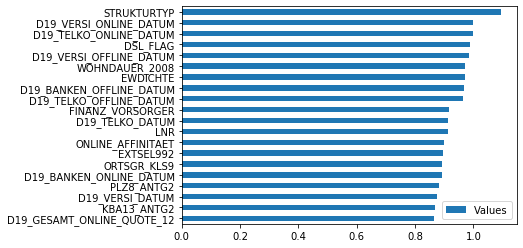

In [ ]:
cluster0=combine_info(customers_v3, customers_pca_model, kmeans, 0)
cluster0

#### Top 10 attributes that best represent this cluster

In [ ]:
cluster0_att=cluster0.index.tolist()
cluster0_att

['STRUKTURTYP',
 'D19_VERSI_ONLINE_DATUM',
 'D19_TELKO_ONLINE_DATUM',
 'DSL_FLAG',
 'D19_VERSI_OFFLINE_DATUM',
 'WOHNDAUER_2008',
 'EWDICHTE',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_TELKO_OFFLINE_DATUM',
 'FINANZ_VORSORGER']

## Cluster 1
The percentage of customers in this clusters is almost equal to the percentage of general population, which mean this cluster is a good representation of perspective customers.

                            Values  \
D19_TELKO_DATUM           0.901445   
KBA05_ANTG1               0.902804   
LNR                       0.913521   
KBA05_GBZ                 0.924788   
ALTER_HH                  0.939921   
D19_TELKO_OFFLINE_DATUM   0.955828   
D19_BANKEN_OFFLINE_DATUM  0.964354   
LP_STATUS_GROB            0.968592   
DSL_FLAG                  0.972077   
D19_VERSI_OFFLINE_DATUM   0.978844   
FINANZ_MINIMALIST         0.980407   
WOHNDAUER_2008            0.983777   
D19_VERSI_ONLINE_DATUM    0.996006   
D19_TELKO_ONLINE_DATUM    0.996528   
ONLINE_AFFINITAET         1.011471   
LP_LEBENSPHASE_FEIN       1.038416   
LP_STATUS_FEIN            1.041598   
LP_LEBENSPHASE_GROB       1.061164   
LP_FAMILIE_FEIN           1.065723   
LP_FAMILIE_GROB           1.108554   

                                                                Description  \
D19_TELKO_DATUM           actuality of the last transaction for the segm...   
KBA05_ANTG1                         number 

,Values,Description,Information level
LP_FAMILIE_GROB,1.108554,family type rough,Person
LP_FAMILIE_FEIN,1.065723,family type fine,Person
LP_LEBENSPHASE_GROB,1.061164,lifestage rough,Person
LP_STATUS_FEIN,1.041598,social status fine,Person
LP_LEBENSPHASE_FEIN,1.038416,lifestage fine,Person
ONLINE_AFFINITAET,1.011471,online affinity,RR1_ID
D19_TELKO_ONLINE_DATUM,0.996528,actuality of the last transaction for the segm...,Household
D19_VERSI_ONLINE_DATUM,0.996006,actuality of the last transaction for the segm...,Household
WOHNDAUER_2008,0.983777,length of residenca,Household
FINANZ_MINIMALIST,0.980407,financial typology: low financial interest,Person


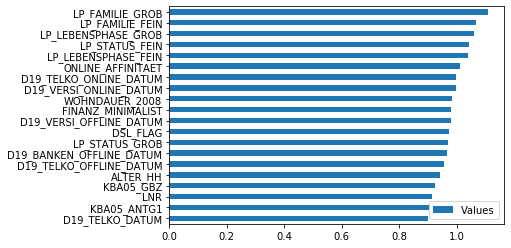

In [ ]:
cluster1=combine_info(customers_v3, customers_pca_model, kmeans, 1)
cluster1

In [ ]:
#### Top 10 attributes that best represent this cluster
cluster1_att=cluster1.index.tolist()
cluster1_att

['LP_FAMILIE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_FEIN',
 'LP_LEBENSPHASE_FEIN',
 'ONLINE_AFFINITAET',
 'D19_TELKO_ONLINE_DATUM',
 'D19_VERSI_ONLINE_DATUM',
 'WOHNDAUER_2008',
 'FINANZ_MINIMALIST']

## Cluster 2

                             Values  \
FINANZ_VORSORGER           0.919142   
KBA13_ANTG2                0.919724   
D19_VERSAND_OFFLINE_DATUM  0.921788   
PLZ8_ANTG2                 0.942559   
PLZ8_ANTG3                 0.943426   
ORTSGR_KLS9                0.945208   
WOHNDAUER_2008             0.947884   
KBA13_ANTG3                0.970554   
D19_BANKEN_DATUM           0.977218   
D19_VERSI_DATUM            0.981381   
D19_TELKO_DATUM            0.981416   
DSL_FLAG                   0.984304   
D19_BANKEN_ONLINE_DATUM    0.986289   
D19_TELKO_OFFLINE_DATUM    0.998100   
D19_TELKO_ONLINE_DATUM     0.999284   
D19_VERSI_ONLINE_DATUM     0.999481   
D19_BANKEN_OFFLINE_DATUM   1.000419   
D19_VERSI_OFFLINE_DATUM    1.000654   
EWDICHTE                   1.037373   
STRUKTURTYP                1.129114   

                                                                 Description  \
FINANZ_VORSORGER                             financial typology: be prepared   
KBA13_ANTG2         

,Values,Description,Information level
STRUKTURTYP,1.129114,NaN,NaN
EWDICHTE,1.037373,density of inhabitants per square kilometer,Postcode
D19_VERSI_OFFLINE_DATUM,1.000654,actuality of the last transaction for the segm...,Household
D19_BANKEN_OFFLINE_DATUM,1.000419,actuality of the last transaction for the segm...,Household
D19_VERSI_ONLINE_DATUM,0.999481,actuality of the last transaction for the segm...,Household
D19_TELKO_ONLINE_DATUM,0.999284,actuality of the last transaction for the segm...,Household
D19_TELKO_OFFLINE_DATUM,0.998100,actuality of the last transaction for the segm...,Household
D19_BANKEN_ONLINE_DATUM,0.986289,actuality of the last transaction for the segm...,Household
DSL_FLAG,0.984304,NaN,NaN
D19_TELKO_DATUM,0.981416,actuality of the last transaction for the segm...,Household


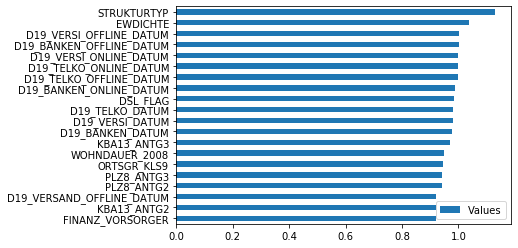

In [ ]:
cluster2=combine_info(customers_v3, customers_pca_model, kmeans, 2)
cluster2

In [ ]:
#### Top 10 attributes that best represent this cluster
cluster2_att=cluster2.index.tolist()
cluster2_att

['STRUKTURTYP',
 'EWDICHTE',
 'D19_VERSI_OFFLINE_DATUM',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_VERSI_ONLINE_DATUM',
 'D19_TELKO_ONLINE_DATUM',
 'D19_TELKO_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'DSL_FLAG',
 'D19_TELKO_DATUM']

## Cluster 3

                             Values  \
FINANZ_VORSORGER           0.818092   
BALLRAUM                   0.820102   
ALTER_HH                   0.821306   
SEMIO_ERL                  0.835345   
D19_GESAMT_OFFLINE_DATUM   0.845960   
UMFELD_JUNG                0.851790   
EXTSEL992                  0.861112   
D19_VERSAND_OFFLINE_DATUM  0.876451   
D19_VERSI_DATUM            0.905291   
LNR                        0.912805   
D19_BANKEN_DATUM           0.937914   
D19_TELKO_DATUM            0.943927   
WOHNDAUER_2008             0.955174   
D19_BANKEN_ONLINE_DATUM    0.956638   
DSL_FLAG                   0.972650   
D19_TELKO_OFFLINE_DATUM    0.980871   
D19_BANKEN_OFFLINE_DATUM   0.989765   
D19_VERSI_OFFLINE_DATUM    0.994097   
D19_TELKO_ONLINE_DATUM     0.997249   
D19_VERSI_ONLINE_DATUM     0.998228   

                                                                 Description  \
FINANZ_VORSORGER                             financial typology: be prepared   
BALLRAUM            

,Values,Description,Information level
D19_VERSI_ONLINE_DATUM,0.998228,actuality of the last transaction for the segm...,Household
D19_TELKO_ONLINE_DATUM,0.997249,actuality of the last transaction for the segm...,Household
D19_VERSI_OFFLINE_DATUM,0.994097,actuality of the last transaction for the segm...,Household
D19_BANKEN_OFFLINE_DATUM,0.989765,actuality of the last transaction for the segm...,Household
D19_TELKO_OFFLINE_DATUM,0.980871,actuality of the last transaction for the segm...,Household
DSL_FLAG,0.972650,NaN,NaN
D19_BANKEN_ONLINE_DATUM,0.956638,actuality of the last transaction for the segm...,Household
WOHNDAUER_2008,0.955174,length of residenca,Household
D19_TELKO_DATUM,0.943927,actuality of the last transaction for the segm...,Household
D19_BANKEN_DATUM,0.937914,actuality of the last transaction for the segm...,Household


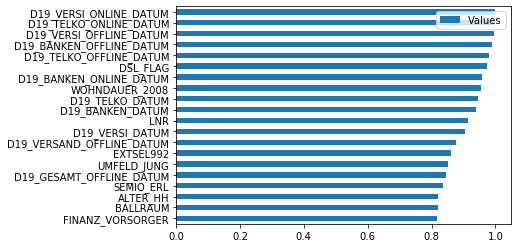

In [ ]:
cluster3=combine_info(customers_v3, customers_pca_model, kmeans, 3)
cluster3

In [ ]:
cluster3_att=cluster2.index.tolist()
cluster3_att

['STRUKTURTYP',
 'EWDICHTE',
 'D19_VERSI_OFFLINE_DATUM',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_VERSI_ONLINE_DATUM',
 'D19_TELKO_ONLINE_DATUM',
 'D19_TELKO_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'DSL_FLAG',
 'D19_TELKO_DATUM']

## Cluster 4
The percentage of customers in this clusters is more than percentage of general population, which mean this cluster is a good representation of perspective customers.

                             Values  \
LNR                        0.913107   
KBA13_KMH_250              0.927314   
RT_SCHNAEPPCHEN            0.927845   
KBA13_KMH_211              0.932136   
D19_VERSAND_DATUM          0.935469   
D19_GESAMT_OFFLINE_DATUM   0.938956   
WOHNDAUER_2008             0.954872   
D19_VERSAND_OFFLINE_DATUM  0.956880   
D19_GESAMT_ONLINE_DATUM    0.964713   
D19_VERSI_DATUM            0.968419   
DSL_FLAG                   0.975201   
D19_VERSAND_ONLINE_DATUM   0.982495   
D19_TELKO_DATUM            0.989747   
D19_TELKO_ONLINE_DATUM     0.999367   
D19_VERSI_ONLINE_DATUM     0.999872   
D19_TELKO_OFFLINE_DATUM    1.001037   
D19_VERSI_OFFLINE_DATUM    1.002110   
D19_BANKEN_DATUM           1.005235   
D19_BANKEN_ONLINE_DATUM    1.005860   
D19_BANKEN_OFFLINE_DATUM   1.005946   

                                                                 Description  \
LNR                                                                      NaN   
KBA13_KMH_250       

,Values,Description,Information level
D19_BANKEN_OFFLINE_DATUM,1.005946,actuality of the last transaction for the segm...,Household
D19_BANKEN_ONLINE_DATUM,1.005860,actuality of the last transaction for the segm...,Household
D19_BANKEN_DATUM,1.005235,actuality of the last transaction for the segm...,Household
D19_VERSI_OFFLINE_DATUM,1.002110,actuality of the last transaction for the segm...,Household
D19_TELKO_OFFLINE_DATUM,1.001037,actuality of the last transaction for the segm...,Household
D19_VERSI_ONLINE_DATUM,0.999872,actuality of the last transaction for the segm...,Household
D19_TELKO_ONLINE_DATUM,0.999367,actuality of the last transaction for the segm...,Household
D19_TELKO_DATUM,0.989747,actuality of the last transaction for the segm...,Household
D19_VERSAND_ONLINE_DATUM,0.982495,actuality of the last transaction for the segm...,Household
DSL_FLAG,0.975201,NaN,NaN


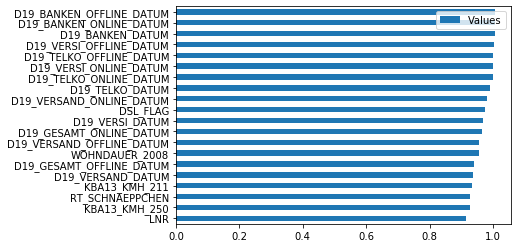

In [ ]:
cluster4=combine_info(customers_v3, customers_pca_model, kmeans, 4)
cluster4

In [ ]:
cluster4_att=cluster2.index.tolist()
cluster4_att

['STRUKTURTYP',
 'EWDICHTE',
 'D19_VERSI_OFFLINE_DATUM',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_VERSI_ONLINE_DATUM',
 'D19_TELKO_ONLINE_DATUM',
 'D19_TELKO_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'DSL_FLAG',
 'D19_TELKO_DATUM']

## Cluster 5

                            Values  \
KBA05_GBZ                 0.947666   
D19_BANKEN_ONLINE_DATUM   0.963115   
RT_SCHNAEPPCHEN           0.963800   
KBA05_ANTG1               0.970912   
D19_TELKO_OFFLINE_DATUM   0.974054   
D19_BANKEN_OFFLINE_DATUM  0.977057   
D19_VERSI_OFFLINE_DATUM   0.987146   
SEMIO_VERT                0.991396   
D19_TELKO_ONLINE_DATUM    0.997941   
D19_VERSI_ONLINE_DATUM    0.998505   
DSL_FLAG                  0.998840   
WOHNDAUER_2008            1.016094   
CJT_TYP_4                 1.035105   
LP_STATUS_GROB            1.036272   
CJT_TYP_6                 1.043066   
CJT_TYP_3                 1.043640   
CJT_TYP_5                 1.043770   
FINANZ_VORSORGER          1.052111   
LP_STATUS_FEIN            1.083459   
FINANZ_MINIMALIST         1.113985   

                                                                Description  \
KBA05_GBZ                              number of buildings in the microcell   
D19_BANKEN_ONLINE_DATUM   actuality of the 

,Values,Description,Information level
FINANZ_MINIMALIST,1.113985,financial typology: low financial interest,Person
LP_STATUS_FEIN,1.083459,social status fine,Person
FINANZ_VORSORGER,1.052111,financial typology: be prepared,Person
CJT_TYP_5,1.043770,NaN,NaN
CJT_TYP_3,1.043640,NaN,NaN
CJT_TYP_6,1.043066,NaN,NaN
LP_STATUS_GROB,1.036272,social status rough,Person
CJT_TYP_4,1.035105,NaN,NaN
WOHNDAUER_2008,1.016094,length of residenca,Household
DSL_FLAG,0.998840,NaN,NaN


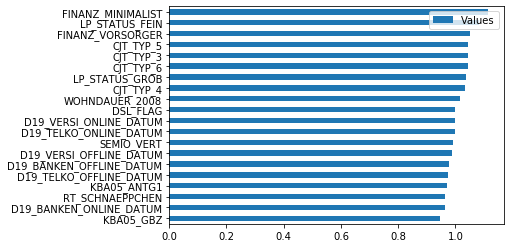

In [ ]:
cluster5=combine_info(customers_v3, customers_pca_model, kmeans, 5)
cluster5

In [ ]:
cluster5_att=cluster5.index.tolist()
cluster5_att

['FINANZ_MINIMALIST',
 'LP_STATUS_FEIN',
 'FINANZ_VORSORGER',
 'CJT_TYP_5',
 'CJT_TYP_3',
 'CJT_TYP_6',
 'LP_STATUS_GROB',
 'CJT_TYP_4',
 'WOHNDAUER_2008',
 'DSL_FLAG']

## Cluster 6
The percentage of customers in this clusters is the highest more than percentage of general population, which mean this cluster is a good representation of perspective customers.

                            Values  \
D19_VERSI_DATUM           0.966979   
WOHNDAUER_2008            0.984326   
DSL_FLAG                  0.985002   
D19_BANKEN_DATUM          0.988743   
D19_TELKO_DATUM           0.989619   
D19_BANKEN_ONLINE_DATUM   0.993870   
CJT_TYP_4                 0.994601   
CJT_TYP_5                 0.994726   
CJT_TYP_3                 0.996422   
D19_TELKO_OFFLINE_DATUM   0.997447   
D19_VERSI_OFFLINE_DATUM   0.999335   
D19_TELKO_ONLINE_DATUM    0.999689   
D19_VERSI_ONLINE_DATUM    0.999875   
D19_BANKEN_OFFLINE_DATUM  0.999881   
FINANZ_VORSORGER          1.007278   
CJT_TYP_6                 1.008928   
D19_VERSAND_DATUM         1.022207   
CJT_KATALOGNUTZER         1.037212   
D19_GESAMT_ONLINE_DATUM   1.051045   
D19_VERSAND_ONLINE_DATUM  1.081430   

                                                                Description  \
D19_VERSI_DATUM           actuality of the last transaction for the segm...   
WOHNDAUER_2008                             

,Values,Description,Information level
D19_VERSAND_ONLINE_DATUM,1.081430,actuality of the last transaction for the segm...,Household
D19_GESAMT_ONLINE_DATUM,1.051045,actuality of the last transaction with the com...,Household
CJT_KATALOGNUTZER,1.037212,NaN,NaN
D19_VERSAND_DATUM,1.022207,actuality of the last transaction for the segm...,Household
CJT_TYP_6,1.008928,NaN,NaN
FINANZ_VORSORGER,1.007278,financial typology: be prepared,Person
D19_BANKEN_OFFLINE_DATUM,0.999881,actuality of the last transaction for the segm...,Household
D19_VERSI_ONLINE_DATUM,0.999875,actuality of the last transaction for the segm...,Household
D19_TELKO_ONLINE_DATUM,0.999689,actuality of the last transaction for the segm...,Household
D19_VERSI_OFFLINE_DATUM,0.999335,actuality of the last transaction for the segm...,Household


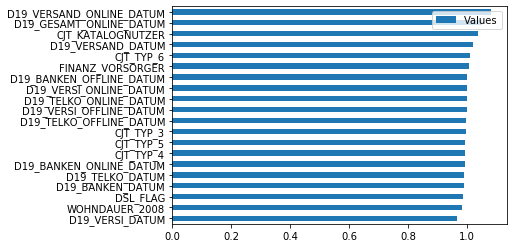

In [ ]:
cluster6=combine_info(customers_v3, customers_pca_model, kmeans, 6)
cluster6

In [ ]:
#Top ten attributes that represent the Customers
cluster6_att=cluster6.index.tolist()
cluster6_att

['D19_VERSAND_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'CJT_KATALOGNUTZER',
 'D19_VERSAND_DATUM',
 'CJT_TYP_6',
 'FINANZ_VORSORGER',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_VERSI_ONLINE_DATUM',
 'D19_TELKO_ONLINE_DATUM',
 'D19_VERSI_OFFLINE_DATUM']

## Using Supervised Learning to classify prespective customers

In [ ]:
mailout_train = pd.read_csv('mailout_train.csv', sep=',')

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mailout_train.shape

(42962, 368)

In [ ]:
mailout_train[mailout_train.columns[19]].value_counts()

6.0    3884
4.0    3685
8.0    3569
2.0    3333
3.0    3105
7.0    2201
5.0    1841
9.0    1747
1.0    1682
6      1479
4      1446
8      1441
2      1370
3      1318
7       863
9       713
1       696
5       690
X        11
Name: CAMEO_DEUG_2015, dtype: int64

In [ ]:
mailout_train[mailout_train.columns[20]].value_counts()

24.0    3024
14.0    2596
51.0    2309
41.0    2212
43.0    1776
25.0    1733
45.0    1363
54.0    1326
24      1186
22.0    1182
13.0    1139
14      1078
55.0    1075
51       905
41       852
23.0     851
15.0     846
25       722
34.0     692
43       676
44.0     558
45       543
31.0     532
54       530
22       502
13       494
55       471
12.0     434
35.0     426
23       354
15       331
52.0     329
32.0     328
33.0     316
34       273
44       203
31       193
35       188
12       163
52       136
32       110
33       106
XX        11
Name: CAMEO_INTL_2015, dtype: int64

In [ ]:
Replace(mailout_train)
asfloat(mailout_train)

In [ ]:
mailout_train[mailout_train.columns[20]].value_counts()

24.0    4210
14.0    3674
51.0    3214
41.0    3064
25.0    2455
43.0    2452
45.0    1906
54.0    1856
22.0    1684
13.0    1633
55.0    1546
23.0    1205
15.0    1177
34.0     965
44.0     761
31.0     725
35.0     614
12.0     597
52.0     465
32.0     438
33.0     422
Name: CAMEO_INTL_2015, dtype: int64

In [ ]:
mailout_train.columns.tolist()

['Unnamed: 0',
 'LNR',
 'AGER_TYP',
 'AKT_DAT_KL',
 'ALTER_HH',
 'ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_TITEL',
 'ARBEIT',
 'BALLRAUM',
 'CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'CJT_GESAMTTYP',
 'CJT_KATALOGNUTZER',
 'CJT_TYP_1',
 'CJT_TYP_2',
 'CJT_TYP_3',
 'CJT_TYP_4',
 'CJT_TYP_5',
 'CJT_TYP_6',
 'D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DATUM',
 'D19_BANKEN_DIREKT',
 'D19_BANKEN_GROSS',
 'D19_BANKEN_LOKAL',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_BANKEN_REST',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT',
 'D19_GARTEN',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D1

In [ ]:
#checking other object columns
for column in categorical_columns:
    print(mailout_train[column].value_counts())

6B    2452
4C    2216
3D    2152
2D    1991
4A    1684
8A    1597
3C    1547
8C    1267
7A    1242
2C    1173
8D    1168
6E    1117
8B     978
2B     942
7B     844
1D     812
5D     787
6C     761
1A     691
9D     669
2A     597
9B     515
4B     481
5A     467
9A     465
4D     447
5B     438
9C     433
5C     422
6F     400
7E     389
3B     383
9E     378
7C     376
6D     375
1E     365
3A     341
1C     313
4E     303
6A     258
5F     239
7D     213
1B     197
5E     178
XX      11
Name: CAMEO_DEU_2015, dtype: int64
D19_UNBEKANNT             10276
D19_SONSTIGE               2753
D19_VERSICHERUNGEN         2662
D19_VOLLSORTIMENT          2289
D19_HAUS_DEKO              2224
D19_BUCH_CD                2089
D19_DROGERIEARTIKEL        1112
D19_BEKLEIDUNG_REST        1056
D19_BEKLEIDUNG_GEH         1054
D19_SCHUHE                 1042
D19_ENERGIE                1007
D19_VERSAND_REST            812
D19_LEBENSMITTEL            782
D19_BANKEN_DIREKT           731
D19_NAHRUNGSERGAENZUNG

In [ ]:
mailout_train['CAMEO_DEU_2015'].replace({"XX": np.nan,"X":np.nan}, inplace=True)

### Missing values

In [ ]:
deleting_missing_columns(mailout_train,0,0)

,column_name,percent_missing
0,ALTER_KIND4,99.904567
1,ALTER_KIND3,99.594991
2,ALTER_KIND2,98.240305
3,ALTER_KIND1,95.372655
4,KK_KUNDENTYP,58.926493
...,...,...
268,LP_LEBENSPHASE_GROB,1.408221
269,LP_STATUS_FEIN,1.408221
270,LP_STATUS_GROB,1.408221
271,RETOURTYP_BK_S,1.408221


In [ ]:
# Missing values more that 50%
deleting_missing_columns(mailout_train,50,0)

,column_name,percent_missing
0,ALTER_KIND4,99.904567
1,ALTER_KIND3,99.594991
2,ALTER_KIND2,98.240305
3,ALTER_KIND1,95.372655
4,KK_KUNDENTYP,58.926493


In [ ]:
#Deleting missing columns with more than 50%
deleting_missing_columns(mailout_train,50,1)

### Deleting Missing Values Row wise

In [ ]:
missing_rows=mailout_train.isna().sum(axis=1)
missing_rows[missing_rows>0]

2          3
8        248
9        248
10       248
11         1
        ... 
42945      2
42947      2
42953      1
42954    247
42956      2
Length: 20069, dtype: int64

In [ ]:
missing_rows=pd.DataFrame(missing_rows)
index_to_remove=missing_rows[missing_rows[0]>100].index.tolist()
len(index_to_remove)

7962

In [ ]:
print("Percentage of missing rows to remove:",round((100/missing_rows.shape[0])*7962,2))

Percentage of missing rows to remove: 18.53


In [ ]:
#We cannot lose 18.5% of data using filling techniques to fillin missing values
missing_rows['percentage']=(100/363)*missing_rows[0]

In [ ]:
missing_rows[missing_rows[0]==248]

,0,percentage
8,248,68.319559
9,248,68.319559
10,248,68.319559
16,248,68.319559
18,248,68.319559
...,...,...
42911,248,68.319559
42917,248,68.319559
42919,248,68.319559
42920,248,68.319559


In [ ]:
fillnamean(mailout_train)

In [ ]:
fillnaobject(mailout_train)

In [ ]:
deleting_missing_columns(mailout_train,0,0)

,column_name,percent_missing


In [ ]:
 mailout_train=mailout_train.drop(['Unnamed: 0'],axis=1)

In [ ]:
mailout_train

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,7.0,0.0,0.0,0.0,0.0,1.0,...,6.0,4.0,2.0,4.0,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42957,66338,2,1.0,0.0,10.0,1.0,0.0,0.0,2.0,2.0,...,1.0,1.0,1.0,4.0,8.0,7.0,1,0,1,4
42958,67629,-1,1.0,0.0,14.0,1.0,0.0,0.0,2.0,1.0,...,1.0,1.0,1.0,5.0,9.0,7.0,1,0,1,3
42959,68273,1,1.0,16.0,10.0,2.0,0.0,0.0,3.0,2.0,...,1.0,2.0,1.0,2.0,9.0,7.0,1,0,1,4
42960,68581,2,1.0,18.0,13.0,3.0,0.0,0.0,3.0,2.0,...,2.0,3.0,4.0,2.0,9.0,2.0,3,0,2,4


c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


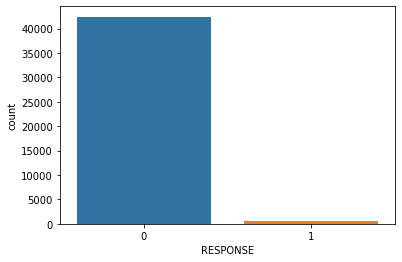

In [ ]:
sns.countplot("RESPONSE", data=mailout_train) 

In [ ]:
X=mailout_train.drop(['RESPONSE'], axis=1)
y=mailout_train['RESPONSE']
print(y.value_counts())

0    42430
1      532
Name: RESPONSE, dtype: int64


### Handing Categorical features

In [ ]:
#checking categorical variables and thier categorization
for column in categorical_columns:
    print(mailout_train[column].value_counts())

6B    2972
4C    2772
3D    2599
2D    2419
4A    2060
8A    1947
3C    1907
8C    1578
7A    1520
2C    1430
8D    1418
6E    1392
8B    1181
2B    1165
7B    1031
1D    1024
5D     975
6C     907
1A     847
9D     818
2A     719
9B     624
4B     597
5A     592
9A     586
5B     554
5C     531
4D     530
9C     521
6F     506
3B     498
7E     467
9E     458
6D     456
7C     446
1E     445
3A     407
4E     372
1C     365
6A     318
5F     283
7D     257
1B     249
5E     219
Name: CAMEO_DEU_2015, dtype: int64
D19_UNBEKANNT             12483
D19_SONSTIGE               3368
D19_VERSICHERUNGEN         3212
D19_VOLLSORTIMENT          2768
D19_HAUS_DEKO              2687
D19_BUCH_CD                2504
D19_DROGERIEARTIKEL        1357
D19_BEKLEIDUNG_GEH         1316
D19_BEKLEIDUNG_REST        1274
D19_SCHUHE                 1265
D19_ENERGIE                1231
D19_VERSAND_REST            978
D19_LEBENSMITTEL            938
D19_BANKEN_DIREKT           907
D19_NAHRUNGSERGAENZUNG      685
D

 One hot encoding for OST_WEST_KZ,
 Nominal encoding for CAMEO_DEU_2015,
 drop EINGEFUEGT_AM - too much categorization,
 drop D19_LETZTER_KAUF_BRANCHE - over categorization 

#### Ordinal Encoding to CAMEO_DEU_2015

In [ ]:

from sklearn.preprocessing import OrdinalEncoder
# define data
data = mailout_train[['CAMEO_DEU_2015']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[[21.]
 [19.]
 [ 8.]
 ...
 [13.]
 [35.]
 [13.]]


In [ ]:
mailout_train[['CAMEO_DEU_2015']]=pd.DataFrame(result)

In [ ]:
mailout_train['CAMEO_DEU_2015']

0        21.0
1        19.0
2         8.0
3         8.0
4        31.0
         ... 
42957    11.0
42958    25.0
42959    13.0
42960    35.0
42961    13.0
Name: CAMEO_DEU_2015, Length: 42962, dtype: float64

#### One hot encoding to 'OST_WEST_KZ'

In [ ]:
mailoutbackup=mailout_train

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = mailout_train[['OST_WEST_KZ']]
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

      OST_WEST_KZ
0               W
1               W
2               O
3               W
4               W
...           ...
42957           W
42958           O
42959           W
42960           W
42961           W

[42962 rows x 1 columns]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
onehot=pd.DataFrame(onehot)
onehot.columns=['O','W']
onehot
#mailout_train=mailout_train.drop(['OST_WEST_KZ'],axis=1)
mailout_train['O']=onehot['O']
mailout_train['W']=onehot['W']

In [ ]:
#droping over categorized columns
mailout_train=mailout_train.drop(['EINGEFUEGT_AM','D19_LETZTER_KAUF_BRANCHE'],axis=1)


In [ ]:
mailout_train.dtypes[mailout_train.dtypes=='O']

Series([], dtype: object)

In [ ]:
Backup=mailout_train
mailout_train.to_csv('mailout_train_backup')

In [ ]:
mailout_train=pd.read_csv('mailout_train_backup.csv')

In [ ]:
y=mailout_train['RESPONSE']
X=mailout_train.drop(['RESPONSE'],axis=1)
print(y.shape)
print(X.shape)

(42962,)
(42962, 361)


### Balancing the dataset using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 5)

In [ ]:
X, y = sm.fit_resample(X, y.ravel())

In [ ]:
X.shape

(84860, 361)

In [ ]:
y.shape

(84860,)

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


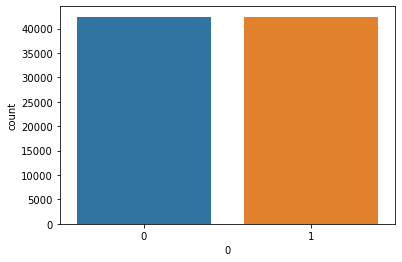

In [ ]:
sns.countplot(0, data=pd.DataFrame(y)) 

### Train Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

In [ ]:
X_test.drop('Unnamed: 0',axis=1,inplace=True)

c:\program files\python36\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Xlog_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train,y_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=10)

In [ ]:
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


The Testing Accuracy is:  0.7365661088852227


In [ ]:
y_pred=log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      8475
           1       0.75      0.71      0.73      8497

    accuracy                           0.74     16972
   macro avg       0.74      0.74      0.74     16972
weighted avg       0.74      0.74      0.74     16972



In [ ]:
 def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

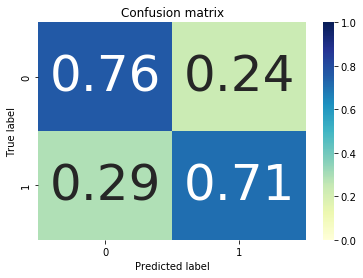

In [ ]:

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')


## Udacity submission

In [ ]:
mailout_test = pd.read_csv('mailout_test.csv', sep=',')

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mailout_test.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
mailout_test.drop(['EINGEFUEGT_AM','D19_LETZTER_KAUF_BRANCHE'],axis=1,inplace=True)

In [ ]:
mailout_test

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,67615,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1
42829,67938,0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,2.0,...,4.0,10.0,9.0,6.0,6.0,9.0,3.0,3,1,4
42830,67942,-1,1.0,16.0,14.0,17.0,NaN,NaN,15.0,1.0,...,2.0,1.0,1.0,1.0,1.0,9.0,3.0,2,1,3
42831,67949,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,1.0,4.0,4.0,2.0,6.0,9.0,3.0,3,2,3


In [ ]:
def replace_x(df):
    x_columns=df.dtypes[df.dtypes=='O'].index.tolist()
    for column in x_columns:
        df[column].replace({"XX": np.nan,"X":np.nan}, inplace=True)

In [ ]:
replace_x(mailout_test)

### Missing Values

In [ ]:
deleting_missing_columns(mailout_test,50,1)

In [ ]:
set(X_train.columns.tolist())-set(mailout_test.columns.tolist())

set()

In [ ]:
fillnamean(mailout_test)
fillnaobject(mailout_test)


In [ ]:
mailout_test.isna().sum().sum()

0

In [ ]:
mailout_test

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,12.0,13.0,14.0,14.0,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,12.0,13.0,14.0,14.0,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,12.0,13.0,14.0,14.0,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,12.0,13.0,14.0,14.0,0.0,1.0,...,2.0,6.0,6.0,3.0,4.0,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,12.0,13.0,14.0,14.0,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,67615,-1,1.0,10.0,12.0,13.0,14.0,14.0,9.0,6.0,...,2.0,4.0,4.0,3.0,4.0,8.0,4.0,3,2,1
42829,67938,0,1.0,10.0,12.0,13.0,14.0,14.0,10.0,2.0,...,4.0,10.0,9.0,6.0,6.0,9.0,3.0,3,1,4
42830,67942,-1,1.0,16.0,14.0,17.0,14.0,14.0,15.0,1.0,...,2.0,1.0,1.0,1.0,1.0,9.0,3.0,2,1,3
42831,67949,-1,1.0,0.0,12.0,13.0,14.0,14.0,0.0,1.0,...,1.0,4.0,4.0,2.0,6.0,9.0,3.0,3,2,3


### Categorical Variables 

OrdinalEncoding for 'CAMEO_DEU_2015'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# define data
data = mailout_test[['CAMEO_DEU_2015']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[[ 6.]
 [18.]
 [30.]
 ...
 [15.]
 [ 1.]
 [35.]]


In [ ]:
mailout_test[['CAMEO_DEU_2015']]=pd.DataFrame(result)

One hot encoding to 'OST_WEST_KZ'

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = mailout_test[['OST_WEST_KZ']]
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

      OST_WEST_KZ
0               W
1               W
2               W
3               O
4               W
...           ...
42828           O
42829           W
42830           W
42831           W
42832           W

[42833 rows x 1 columns]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
onehot=pd.DataFrame(onehot)
onehot.columns=['O','W']
onehot
mailout_test=mailout_test.drop(['OST_WEST_KZ'],axis=1)
mailout_test['O']=onehot['O']
mailout_test['W']=onehot['W']

{'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'KK_KUNDENTYP'}

In [ ]:
set(X_train.columns.tolist())-set(mailout_test.columns.tolist())

set()

In [ ]:
X_train.shape

(67888, 360)

In [ ]:
mailout_test.shape

(42833, 365)

In [ ]:
list_to_Delete=list(set(mailout_test.columns.tolist())-set(X_train.columns.tolist()))

In [ ]:
mailout_test.drop(list_to_Delete,axis=1,inplace=True)

In [ ]:
mailout_test.to_csv('mailout_test_processed.csv')

In [ ]:
mailout_test_pred=log_reg.predict_proba(mailout_test)


In [ ]:
mailout_test_Result=pd.DataFrame(mailout_test_pred)

In [ ]:
mailout_test_Result.columns=["0","RESPONSE"]

In [ ]:
mailout_test_Result

,0,RESPONSE
0,0.069601,0.930399
1,0.422997,0.577003
2,0.829225,0.170775
3,0.652540,0.347460
4,0.967094,0.032906
...,...,...
42828,0.808563,0.191437
42829,0.682904,0.317096
42830,0.973417,0.026583
42831,0.589787,0.410213


In [ ]:
submission=pd.DataFrame()

In [ ]:
submission['LNR']=mailout_test['LNR']

In [ ]:
submission['RESPONSE']=mailout_test_Result['RESPONSE']

In [ ]:
submission.to_csv('Submission_result')

In [ ]:
submission

,LNR,RESPONSE
0,1754,0.930399
1,1770,0.577003
2,1465,0.170775
3,1470,0.347460
4,1478,0.032906
...,...,...
42828,67615,0.191437
42829,67938,0.317096
42830,67942,0.026583
42831,67949,0.410213
